# Figure 3
This figure compares ddPCR and smFISH data

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


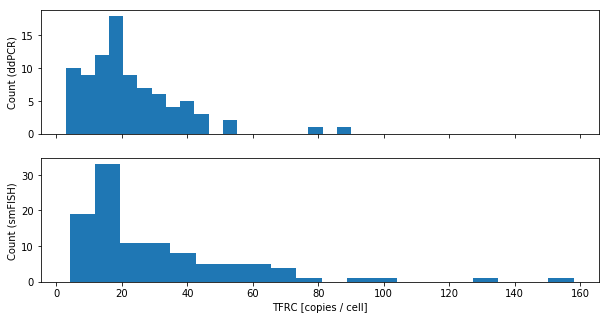

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

# Load the ddPCR data
ddPCR = pd.read_csv('./Figure3B/ddPCR_TFRC_WT_SingleCell_8col_20180829.csv', index_col=False)
wild_type = ddPCR[ddPCR.Sample == 'WT']
ddPCR_wt_counts = wild_type[wild_type.Target == 'TFRC'].CopiesPer20uLWell.dropna().as_matrix()

# Load the smFISH data
smFISH_wt = pd.read_csv('./Figure3B/TFRC_WT_FISH.csv')

smFISH_wt_counts = smFISH_wt.tfrc_counts.values

# Plot the data


f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5))

ax1.hist(ddPCR_wt_counts, bins=20);
ax1.set_ylabel('Count (ddPCR)');

ax2.set_ylabel('Count (smFISH)');

ax2.hist(smFISH_wt_counts, bins=20);

ax2.set_xlabel('TFRC [copies / cell]');

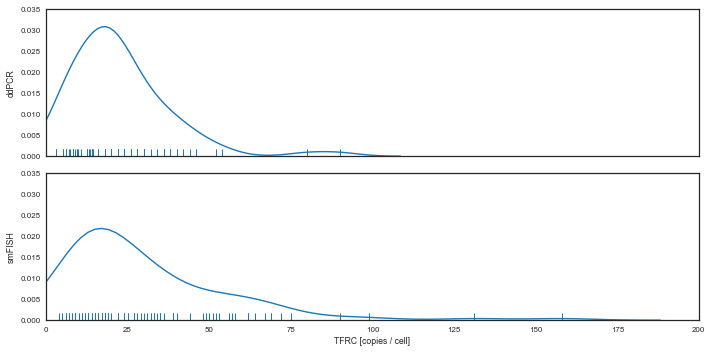

In [12]:
import seaborn as sns

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5))

sns.distplot(ddPCR_wt_counts, rug=True, hist=False, ax=ax1).set(xlim=(0, 200))

sns.distplot(smFISH_wt_counts, rug=True, hist=False, ax=ax2)

ylim = 0.035
ax1.set_ylim(0, ylim);
ax2.set_ylim(0, ylim);

ax1.set_ylabel('ddPCR');
ax2.set_ylabel('smFISH');

ax2.set_xlabel('TFRC [copies / cell]');

plt.style.use(['seaborn-white', 'seaborn-paper'])
#matplotlib.rc("font", family="Times New Roman")
plt.tight_layout()

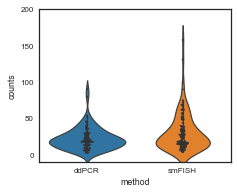

In [40]:
import pandas as pd
import numpy as np

counts = np.concatenate((ddPCR_wt_counts, smFISH_wt_counts))

ddPCR_labels = ['ddPCR'] * len(ddPCR_wt_counts)
smFISH_labels = ['smFISH'] * len(smFISH_wt_counts)
labels = ddPCR_labels + smFISH_labels

df = pd.DataFrame(data={'counts': counts, 'method': labels})

fig, ax = plt.subplots()

sns.set_context("paper")
sns.violinplot(x="method", y="counts", data=df);
sns.swarmplot(x="method", y="counts", data=df, color=".2", size=2);

ax.set_ylim((-10, 200))

plt.tight_layout()
fig.set_size_inches(3, 2.5)

plt.savefig("Figure3B.pdf", transparent=True, bbox_inches = "tight")

**Figure 3B:** Comparison of ddPCR and smFISH measurements of copy number in single 293T cells.